<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». В ходе работы над проектом разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

## Загрузка данных

Начнем работу с импорта необходимых для работы библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Откроем датасет, выведем первые несколько строк датасета, а также выведем информацию о нем

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
display(data.head(10))
data.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Как мы видим в датасете имеется 5000 строк, пропуски в столбцах отсутствуют

Посмотрим отдельно на данные в каждом столбце нашего датасета и построим для наглядности графики 

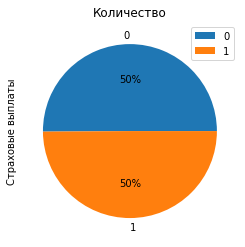

In [3]:
data.groupby(['Пол']).count().plot(kind='pie', y='Страховые выплаты', autopct='%1.0f%%', title='Количество')
plt.show()

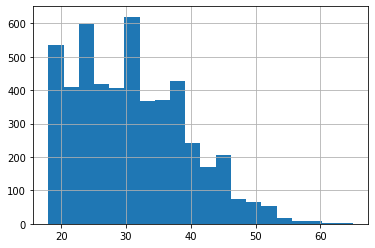

In [4]:
data['Возраст'].hist(bins=20)
plt.show()

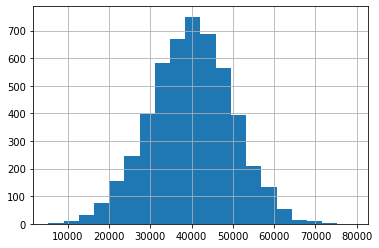

In [5]:
data['Зарплата'].hist(bins=20)
plt.show()

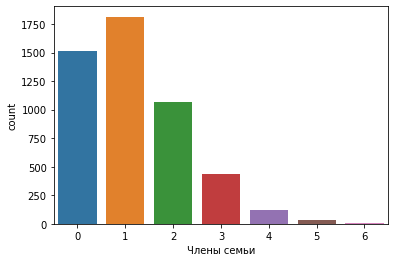

In [6]:
sns.countplot(data=data, x="Члены семьи")
plt.show()

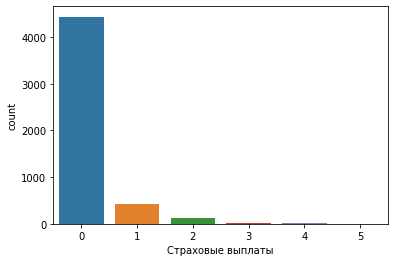

In [7]:
sns.countplot(data=data, x="Страховые выплаты")
plt.show()

Посмотрим на наличие мультиколлинеарности в нашем датасете.\
Поскольку столбец "Пол" содержит категориальные данные, то его в корреляционном анализе мы учитывать не будем

In [8]:
data.drop(['Пол'], axis=1).corr(method='spearman')

,Возраст,Зарплата,Члены семьи,Страховые выплаты
Возраст,1.000000,-0.020238,-0.001503,0.548589
Зарплата,-0.020238,1.000000,-0.025492,-0.005549
Члены семьи,-0.001503,-0.025492,1.000000,-0.029210
Страховые выплаты,0.548589,-0.005549,-0.029210,1.000000


Как видим мультиколлинеарности в нашем датасете не наблюдается

## Умножение матриц

Нам необходимо ответить на вопрос: изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу?

Для начала запишем обозначения и формулы, необходимые нам для линейной регрессии

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки, квадратная, обратимая

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** при умножении признаков на обратимую матрицу качество линейной регрессии не изменится 

**Обоснование:** докажем, что исходные предсказания и предсказания после домножения признаков на обратимую матрицу равны (если они будут равны, то и качество линейной регрессии не изменится)

Для начала запишем новую формулу предсказания:\
$$
a1 = XPw1
$$

Далее запишем новую формулу обучения:\
$$
w1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Воспользуемся следующим свойством транспонирования: 
$$
    (AB)^T = B^T A^T 
$$

Получим:
$$
w1 = (P^T X^T XP)^{-1} P^T X^T y
$$

Далее воспользуемся следующим свойством обратных матриц:
$$
    (AB)^{-1} = B^{-1} A^{-1} 
$$

Раскроем скобки и получим:
$$
w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Воспользуемся свойством перемножения обратных матриц:
$$
    A A^{-1}  = A^{-1} A = E 
$$

Получим:
$$
w1 =  P^{-1} (X^T X)^{-1}  E X^T y
$$

Используем свойство умножения на E (единичную матрицу):
$$
    A E = E A = A 
$$

Получим:
$$
w1 = P^{-1} (X^T X)^{-1} X^T y
$$

Как мы знаем:
$$
(X^T X)^{-1} X^T y = w
$$

Получим:
$$
w1 =  P^{-1} w 
$$

Подставим полученное значение $w1$ в новую формулу предсказания:
$$
a1 = XPw1 = XP P^{-1} w 
$$

Вновь используем свойство:
$$
    A A^{-1}  = A^{-1} A = E 
$$

Получим: $$
a1 = XP P^{-1} w = X E w
$$

Снова используя свойство умножения на E (единичную матрицу) получим:
$$
a1 = X w
$$

Учитывая, чему равны исходные предсказания получим:$$
a = Xw = a1
$$

Таким образом мы доказали, что исходные предсказания и предсказания после домножения признаков на обратимую матрицу равны, следовательно качество линейной регрессии при домножении не изменится 

## Алгоритм преобразования

**Алгоритм**

- создать обратимую матрицу (проверить ее на обратимость)
- домножить матрицу признаков на обратимую матрицу 
- оценить качество линейной регрессии используя метрику R2 и сравнить ее с метрикой R2 исходной модели

**Обоснование**

Принцип, используемый в алгоритме, обоснован в пункте 2 и доказано, что качество линейной регрессии при домножении на обратимую матрицу не изменится 

## Проверка алгоритма

Реализуем наш алгоритм и убедимся в его работе на практике

Для начала посчитаем метрику R2 на модели линейной регрессии без домножении на обратимую матрицу.\
Начнем с разделения исходных данных на обучающую и валидационную выборки в соотношении 75:25

In [9]:
data_train, data_valid = train_test_split(data, test_size=0.25, random_state=12345)

Целевым признаком в нашем датасете является столбец "Страховые выплаты" - именно в нем содержится информацию о количестве страховых выплат клиенту за последние 5 лет и его нам необходимо предсказывать. Остальные столбцы датасета будут признаками. 

In [10]:
features_train = data_train.drop(['Страховые выплаты'], axis=1)
target_train = data_train['Страховые выплаты']
features_valid = data_valid.drop(['Страховые выплаты'], axis=1)
target_valid = data_valid['Страховые выплаты']

Далее воспользуемся моделью линейной регрессии и посчитаем метрику R2 

In [11]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
r2 = r2_score(target_valid, predictions)
print('Метрика R2 без домножения:', r2)

Метрика R2 без домножения: 0.43522757127026546


Теперь создададим обратимую квадратную матрицу (создадим рандомную матрицу и проверим ее на обратимость). Поскольку мы будем умножать ее на матрицу принаков, то чтобы произошло перемножение матриц нам необходимо, чтобы число строк обратимой матрицы равнялось числу столбцов в матрице признаков (в нашем случае 4 признака). Поскольку создаваемая матрица квадратная (обратимыми бывают только квадратные матрицы), то число столбцов в ней равно числу строк - то есть размер создаваемой нами матрицы 4х4

In [12]:
P = np.random.normal(size = (4,4))
P1 = np.linalg.inv(P) # ошибки не возникает, значит созданная нами матрица P обратима

Далее домножим матрицы признаков на обратимую матрицу 

In [13]:
features_train_p = features_train @ P
features_valid_p = features_valid @ P

Воспользуемся моделью линейной регрессии и посчитаем метрику R2 после домножения признаков на обратимую матрицу 

In [14]:
model = LinearRegression()
model.fit(features_train_p, target_train)
predictions = model.predict(features_valid_p)
r2 = r2_score(target_valid, predictions)
print('Метрика R2 после домножения:', r2)

Метрика R2 после домножения: 0.4352275712702548


Как мы видим значение метрик R2 равны, следовательно качество линейной регрессии при домножении признаков на обратимую матрицу не меняется

<b>Вывод: </b> нам удалось разработать метод преобразования данных, по которому сложно восстановить персональные данные клиентов страховой компании «Хоть потоп». Разработанный метод позволяет защитить данные, и при этом при преобразовании данных качество моделей машинного обучения не ухудшается. Основной принцип данного метода заключается в умножении признаков на обратимую матрицу